In [4]:
'''
Business and Data Understanding

Being an Airbnb user, I tried to analyze what was important for me while renting an Airbnb listing. 

It was both time and price of the listing.
So I tried to figure out various filters that might help save time while picking out the rentals with least listing price. 

I tried looking at the data to connect the dots and thought correlating price to various features on the listing such as number of 
rooms, bathrooms, accomodation capacity etc.
Using a machine learning model would help us decipher what the most important features are when it comes to the listing  price.
'''

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
'''
Data Understanding 

The steps below were performed to understand the data and to clean it for using the model

I have first imported the dataset.

Then I have checked the mean price distribution and volume distribution
based on the property type, apartment type, room type, accommodation capacity,
review score rating and the number of reviews.

I also tried plotting distribution of these features and to see if price follows a trend based on cities.
So I plotted correlation graph of the features and price based on the cities. 
The features include  accommodation capacity, bedrooms, beds and bathrooms
cleaning fee reviews score rating and number of reviews.
Based on the graph the cities did not follow a similar trend and the trends were quite different.

'''

In [74]:
'''
Data Preparation

Looked at features in the dataset.
I added the following information using the features in the dataset.
As longitude and latitude was given, it would be useful to calculate the distance to the city center based on the city.
I used the haversine formula to calculate the circular distance between the city center and the coordinates of the listing.

I added sentiment information from the name and the description mentioned on the listing. The sentiment scores would be for 
negative, positive, neutral and compount sentiment. This might definitely impact the price and popularity of the listing.

Then I converted the first review, host since and last review dates into a useful number. Based on each city I found the maximum date 
based on each metric and then I subtracted it.
This gave the recency number of the dates.

I seperated all the amenities that was a long list provided in a column. Then I converted these categorical variable to multiple
numerical columns. As there were a lot of amenities, I also dropped amentities having very few entries.

I also converted the host response rate by stripping the % off and converting it to an integer.

I converted all the categorical columns to numerical columns so that I can provide these features as an input to 
machine learning models.

'''



In [ ]:
'''
Data Modeling

I used gradient boosting regressor and random forest regressor
Then I used rscore on the training and test dataset to compare performance of both the classifiers.
Gradient boosting regressor performed better. 
'''

In [ ]:
'''
Evaluating the results

As the machine learning model, gradient boosting regressor performed better than the random forest regressor.
I went ahead and got the most important features in regard to the listing price. 
And the  graphs were evaluated to see the variation of price along with the feature choice.
So the graphs and the most important features will help to decide how to proceed based on our choices of preference and 
price.

'''

In [ ]:
'''
Handling missing values

The missing value distribution is as below:-

cancellation_policy                0.000000
cleaning_fee                       0.000000
city                               0.000000
description                        0.000000
first_review                      21.405729
host_has_profile_pic               0.253674
host_identity_verified             0.253674
host_response_rate                24.691341
host_since                         0.253674
instant_bookable                   0.000000
last_review                       21.355804
latitude                           0.000000
longitude                          0.000000
name                               0.000000
neighbourhood                      9.272578
number_of_reviews                  0.000000
review_scores_rating              22.563452
thumbnail_url                     11.086074
zipcode                            1.303450
bedrooms                           0.122789
beds                               0.176762
r_band                             0.000000
n_band                             0.000000
distance_to_citycenter             0.000000
description_neg_sentiment          0.000000
description_neu_sentiment          0.000000
description_pos_sentiment          0.000000
description_compound_sentiment     0.000000
name_neg_sentiment                 0.000000
name_neu_sentiment                 0.000000
name_pos_sentiment                 0.000000
name_compound_sentiment            0.000000
data_max_date                      0.000000
dtype: float64


For the dates first review, host since and last review I have replaced the data with 0. 
About 21% of first review and last review dates are missing and about less than 1% of 
Because the data here is very unevenly distributed.

For the listing image url I have replaced nulls with 0 ie missing image. Rest of the urls have been replaced with 1.

For amentities I have dropped the ones that are outliers.

I dropped neighbourhood data as most of the data was spread out with lots of missing values.

For all other numerical columns left I replaced the null values with median value.  

'''

In [186]:
#importing the train and test set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
from sklearn.metrics import r2_score
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
train = pd.read_csv('./airbnb-listings-in-major-us-cities-deloitte-ml/train.csv')                                                                                                                                                     
test = pd.read_csv('./airbnb-listings-in-major-us-cities-deloitte-ml/test.csv')     

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [187]:
dataset=train.groupby('property_type').log_price.mean()
print(dataset)

property_type
Apartment             4.758850
Bed & Breakfast       4.556068
Boat                  5.200865
Boutique hotel        5.083352
Bungalow              4.783268
Cabin                 4.646499
Camper/RV             4.602238
Casa particular       4.382027
Castle                5.368424
Cave                  4.909373
Chalet                4.764325
Condominium           5.026539
Dorm                  3.746140
Earth House           5.285391
Guest suite           4.717513
Guesthouse            4.685184
Hostel                3.647333
House                 4.797114
Hut                   4.022837
In-law                4.816649
Island                5.010635
Lighthouse            5.521461
Loft                  5.007919
Other                 4.946367
Parking Space         4.605170
Serviced apartment    5.147467
Tent                  4.197131
Timeshare             5.602600
Tipi                  5.246118
Townhouse             4.833539
Train                 5.204399
Treehouse             4.8

In [188]:
x=train.property_type.unique()
print(x)
y=[]
for a in x:
    y.append(train[train['property_type']==a]['log_price'].mean())
print(y)

['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']
[4.758850025405184, 4.797113575777436, 5.026538584026184, 5.0079187888927565, 4.833538580315444, 3.6473330657197867, 4.717513044476204, 4.556067512313946, 4.783267621119243, 4.685184390801043, 3.7461402760246605, 4.946366802624568, 4.602237913420423, 5.112426896999262, 5.083351792436799, 5.602600194590793, 4.816649318167724, 5.200864630766853, 5.147466758209801, 5.368423806591423, 4.646498617159732, 4.84552011428258, 5.246117704219109, 5.420951027891479, 4.197130952488377, 4.022836929917487, 4.382026634673881, 4.764325278519716, 4.944359564178421, 5.285391225758667, 4.605170185988092, 5.20439899780700

In [189]:
#Checking the distribution of apartment type

In [190]:
train[~train['property_type'].isin(['Apartment','House','Condominium','Loft','Townhouse'])]['log_price'].mean()

4.739299311829609

In [191]:
y1=[]
for a in x:
    y1.append((train[train['property_type']==a].shape[0]/train.shape[0])*100)
print(y1)

[66.1210886373143, 22.27874404609302, 3.5865121237063327, 1.6785632362267409, 2.283061893646017, 0.09445291522176195, 0.16596726531823885, 0.6233892404636289, 0.4938538138737839, 0.6719650254348207, 0.1916044851641457, 0.8190417077087071, 0.12683677186922318, 0.2415295974956484, 0.09310358786145106, 0.10389820674393815, 0.09580224258207284, 0.08770627842020753, 0.028335874566528585, 0.017541255684041506, 0.09715156994238372, 0.009445291522176196, 0.004047982080932655, 0.014842600963419736, 0.02428789248559593, 0.01079461888248708, 0.001349327360310885, 0.00809596416186531, 0.012143946242797965, 0.00539730944124354, 0.001349327360310885, 0.00269865472062177, 0.00269865472062177, 0.001349327360310885, 0.001349327360310885]


In [192]:
x=train.property_type.unique()
print(x)
y=[]
for a in x:
    y.append(train[train['property_type']==a]['log_price'].mean())
print(y)

['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']
[4.758850025405184, 4.797113575777436, 5.026538584026184, 5.0079187888927565, 4.833538580315444, 3.6473330657197867, 4.717513044476204, 4.556067512313946, 4.783267621119243, 4.685184390801043, 3.7461402760246605, 4.946366802624568, 4.602237913420423, 5.112426896999262, 5.083351792436799, 5.602600194590793, 4.816649318167724, 5.200864630766853, 5.147466758209801, 5.368423806591423, 4.646498617159732, 4.84552011428258, 5.246117704219109, 5.420951027891479, 4.197130952488377, 4.022836929917487, 4.382026634673881, 4.764325278519716, 4.944359564178421, 5.285391225758667, 4.605170185988092, 5.20439899780700

In [193]:
train[~train['property_type'].isin(['Apartment','House','Condominium','Loft','Townhouse'])]['log_price'].mean()

4.739299311829609

In [194]:
y1=[]
for a in x:
    y1.append((train[train['property_type']==a].shape[0]/train.shape[0])*100)
print(y1)

[66.1210886373143, 22.27874404609302, 3.5865121237063327, 1.6785632362267409, 2.283061893646017, 0.09445291522176195, 0.16596726531823885, 0.6233892404636289, 0.4938538138737839, 0.6719650254348207, 0.1916044851641457, 0.8190417077087071, 0.12683677186922318, 0.2415295974956484, 0.09310358786145106, 0.10389820674393815, 0.09580224258207284, 0.08770627842020753, 0.028335874566528585, 0.017541255684041506, 0.09715156994238372, 0.009445291522176196, 0.004047982080932655, 0.014842600963419736, 0.02428789248559593, 0.01079461888248708, 0.001349327360310885, 0.00809596416186531, 0.012143946242797965, 0.00539730944124354, 0.001349327360310885, 0.00269865472062177, 0.00269865472062177, 0.001349327360310885, 0.001349327360310885]


In [195]:
#Checking distribution of the room type

In [196]:
x=train.room_type.unique()

In [197]:
y=[]
for a in x:
    y.append(train[train['room_type']==a]['log_price'].mean())
print(x)
print(y)

['Entire home/apt' 'Private room' 'Shared room']
[5.167216959721771, 4.3277528365545095, 3.8615347541298277]


In [198]:
y1=[]
for a in x:
    y1.append((train[train['room_type']==a].shape[0]/train.shape[0])*100)
print(y1)

[55.74071325444267, 41.34069166520489, 2.9185950803524445]


In [199]:
#Distribution of accomodation capacity

In [200]:
x=train.accommodates.unique()

In [201]:
x=np.sort(x)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [202]:
y=[]
for a in x:
    y.append(train[train['accommodates']==a]['log_price'].mean())
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[4.179498705117151, 4.552346111411474, 4.805300217711918, 5.062760802606993, 5.257154664986086, 5.4500174561694035, 5.532042786769811, 5.73297345239437, 5.706756607665438, 5.852773346056761, 5.834621745462745, 6.103809044333061, 5.877947298928759, 6.029038545020975, 5.991333206328234, 6.097753117846917]


In [203]:
y1=[]
for a in x:
    y1.append((train[train['accommodates']==a].shape[0]/train.shape[0])*100)
print(y1)

[12.729554317172889, 42.98147373534293, 10.516657446263038, 16.280983929511137, 4.647083428910688, 6.704807653384788, 1.2764636828540974, 2.4220426117580387, 0.36431838728393895, 0.9458784795779304, 0.10659686146455992, 0.35622242312207364, 0.04857578497119186, 0.14033004547233205, 0.07286367745678779, 0.4061475354535764]


In [204]:
#Distribution of bathrooms

In [205]:
x=train.bathrooms.unique()
print(x)

[1.  1.5 2.  nan 2.5 3.  0.5 4.5 5.  0.  4.  3.5 5.5 7.5 6.  8.  7.  6.5]


In [206]:
x=np.sort(x)
print(x)
x = x[~np.isnan(x)]
print(x)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  nan]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ]


In [207]:
y=[]
for a in x:
    y.append(train[train['bathrooms']==a]['log_price'].mean())
print(x)
print(y)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ]
[4.196514375686399, 4.2353363733213, 4.67396586978084, 4.778718127702659, 5.198798555926777, 5.5164328168149925, 5.537678304072114, 6.063392634820611, 5.675429522812858, 6.486015638662764, 6.280603237659001, 6.848374363903976, 6.741812890002497, 6.664458595286157, 6.798562585434513, 7.451450928368518, 4.6296302985124695]


In [208]:
y1=[]
for a in x:
    y1.append((train[train['bathrooms']==a].shape[0]/train.shape[0])*100)
print(y1)

[0.26716681734155523, 0.282009418304975, 78.39457030670211, 5.128793296541674, 10.708261931427183, 2.1143959736071567, 1.4383829660914034, 0.5788614375733697, 0.3859076250489131, 0.15652197379606267, 0.09715156994238372, 0.052623767052124515, 0.03238385664746124, 0.01619192832373062, 0.01349327360310885, 0.00809596416186531, 0.05532242177274629]


In [209]:
#Let's look at listing ratings

In [210]:
y=[]
for a in x:
    y.append(train[train['review_scores_rating']==a]['log_price'].mean())
print(x)
print(y)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [211]:
r_band=[]
for r in train['review_scores_rating']:
    r = str(r)
    r = r.strip('.')
    r = float(r)
    if r<=50:
        r_band.append('a:<=50')
    elif r>50 and r<=60:
        r_band.append('b:<=60')
    elif r>60 and r<=70:
        r_band.append('c:<=70')
    elif r>70 and r<=80:
        r_band.append('d:<=80')
    elif r>80 and r<=90:
        r_band.append('e:<=90')
    elif r>90 and r<=95:
        r_band.append('f:<=95')
    elif r>95:
        r_band.append('g:>95')
    else:
        r=str(r)
        r_band.append(r)

In [212]:
train['r_band']=r_band

In [213]:
x=train.r_band.unique()
x=np.sort(x)
print(*x,sep='\n')

a:<=50
b:<=60
c:<=70
d:<=80
e:<=90
f:<=95
g:>95
nan


In [214]:
y1=[]
for a in x:
    y1.append((train[train['r_band']==a].shape[0]/train.shape[0])*100)
print(*y1,sep='\n')

0.31034529287150353
0.6247385678239398
0.47226457610880973
3.8307403759226024
11.41800812295071
18.427763759765757
42.35268718543806
22.56345211911862


In [215]:
y=[]
for a in x:
    y.append(train[train['r_band']==a]['log_price'].mean())
print(x)
print(*y,sep='\n')

['a:<=50' 'b:<=60' 'c:<=70' 'd:<=80' 'e:<=90' 'f:<=95' 'g:>95' 'nan']
4.540410173542062
4.556350643298796
4.575162301798293
4.622391201135779
4.6509178985337485
4.730949795991699
4.801480963334183
4.894763214557857


In [216]:
#Let's look at number of reviews for the listing

In [217]:
n_band=[]
for r in train['number_of_reviews']:
    if r<=100:
        n_band.append('a:<=100')
    elif r>100 and r<=200:
        n_band.append('b:<=200')
    elif r>200 and r<=300:
        n_band.append('c:<=300')
    elif r>300 and r<=400:
        n_band.append('d:<=400')
    elif r>400 and r<=500:
        n_band.append('e:<=500')
    elif r>500:
        n_band.append('f:>500')
    else:
        r=str(r)
        n_band.append(r)

In [218]:
train['n_band']=n_band

In [219]:
x=train.n_band.unique()
x=np.sort(x)
print(*x,sep='\n')

a:<=100
b:<=200
c:<=300
d:<=400
e:<=500
f:>500


In [220]:
y1=[]
for a in x:
    y1.append((train[train['n_band']==a].shape[0]/train.shape[0])*100)
print(*y1,sep='\n')

95.45411612311263
3.8509802863272657
0.5437789262052867
0.12683677186922318
0.01619192832373062
0.00809596416186531


In [221]:
y=[]
for a in x:
    y.append(train[train['n_band']==a]['log_price'].mean())
print(x)
print(*y,sep='\n')

['a:<=100' 'b:<=200' 'c:<=300' 'd:<=400' 'e:<=500' 'f:>500']
4.78508148935369
4.730337861404175
4.6671709559275705
4.597613001354407
4.489602762818031
5.0639931273978895


In [222]:
#Let's look at the number of bedrooms

In [223]:
x=train.bedrooms.unique()
x=np.sort(x)
x = x[~np.isnan(x)]
print(*x,sep='\n')

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


In [224]:
y1=[]
for a in x:
    y1.append((train[train['bedrooms']==a].shape[0]/train.shape[0])*100)
print(*y1,sep='\n')

9.060733224487592
67.1749133057171
15.316214866888856
5.814251595579604
1.7946053892134772
0.4790112129103642
0.1430287001929538
0.05127443969181364
0.018890583044352392
0.01079461888248708
0.01349327360310885


In [225]:
y=[]
for a in x:
    y.append(train[train['bedrooms']==a]['log_price'].mean())
print(x)
print(*y,sep='\n')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
4.821460161232413
4.540539595206093
5.276652285700921
5.645130369767086
5.989968478759397
6.235148087979339
6.499354268005425
6.584989300136217
6.454128465044333
6.508683456012917
6.4802187470901655


In [226]:
print(x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [227]:
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,r_band,n_band
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,g:>95,a:<=100
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,f:<=95,a:<=100
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,f:<=95,a:<=100
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,nan,a:<=100
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,a:<=50,a:<=100


In [228]:
test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,3895911,Apartment,Private room,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",2,1.0,Real Bed,flexible,True,LA,...,34.028372,-118.494449,Santa Monica Private Bedroom/Bathroom Suite,Santa Monica,6,97.0,https://a0.muscache.com/im/pictures/92355eae-b...,90403,1.0,1.0
1,9710289,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",3,1.0,Real Bed,moderate,True,NYC,...,40.720380,-73.942329,"Bright, charming luxury 1 BR with amazing rooftop",Williamsburg,2,80.0,https://a0.muscache.com/im/pictures/da03e413-d...,11222,1.0,1.0
2,9051635,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",1,1.0,Real Bed,moderate,True,SF,...,37.785434,-122.470284,Private room in charming apartment,Richmond District,2,100.0,https://a0.muscache.com/im/pictures/0ba7d8aa-9...,94118,1.0,1.0
3,708374,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",1,1.0,Real Bed,strict,True,LA,...,33.976026,-118.463471,Marina del Rey Beach Jr 1 Bdrm 5,Marina Del Rey,7,94.0,https://a0.muscache.com/im/pictures/30279741/4...,90292,0.0,1.0
4,626296,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,NYC,...,40.735573,-74.005996,Bright Studio Loft Prime Location,West Village,0,NaN,https://a0.muscache.com/im/pictures/9384e262-8...,10014,1.0,1.0


In [229]:
corr_matrix = train.corr()
corr_matrix["log_price"].sort_values(ascending=False)

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
cleaning_fee            0.111191
review_scores_rating    0.091219
latitude               -0.002193
id                     -0.007178
number_of_reviews      -0.032470
longitude              -0.047529
Name: log_price, dtype: float64

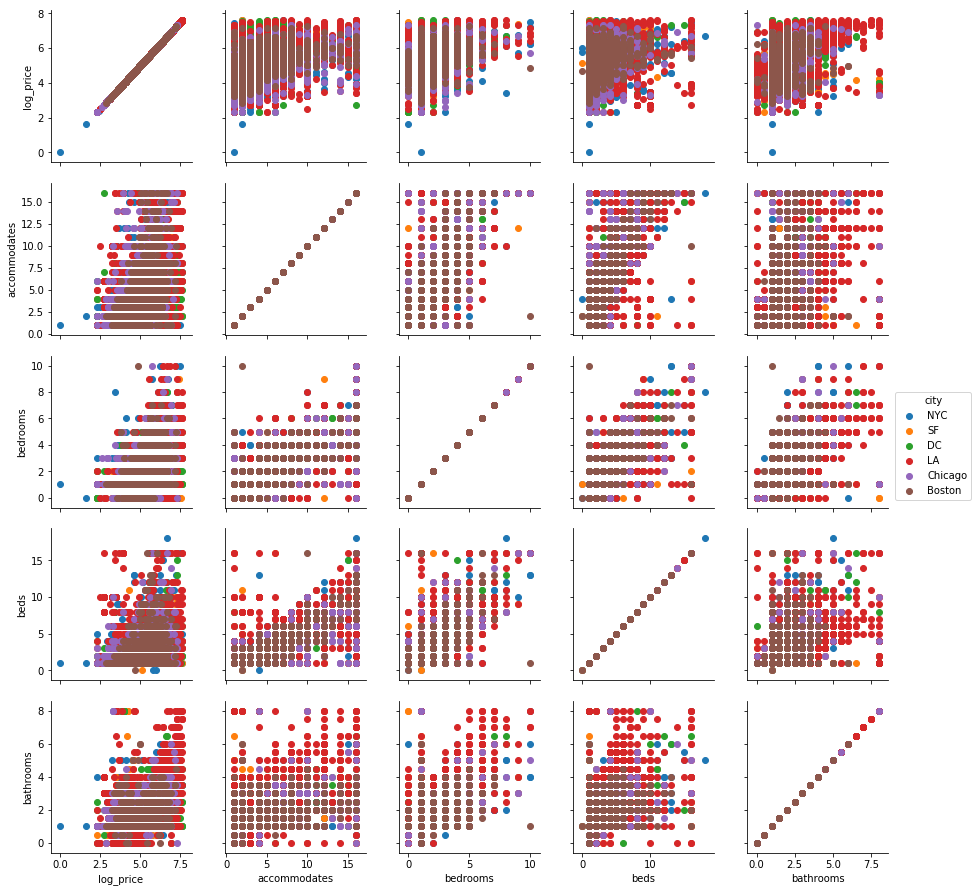

In [230]:
corrGraph = sns.PairGrid(train, hue="city", vars=["log_price", "accommodates","bedrooms","beds", "bathrooms"])
corrGraph = corrGraph.map(plt.scatter)
corrGraph = corrGraph.add_legend()

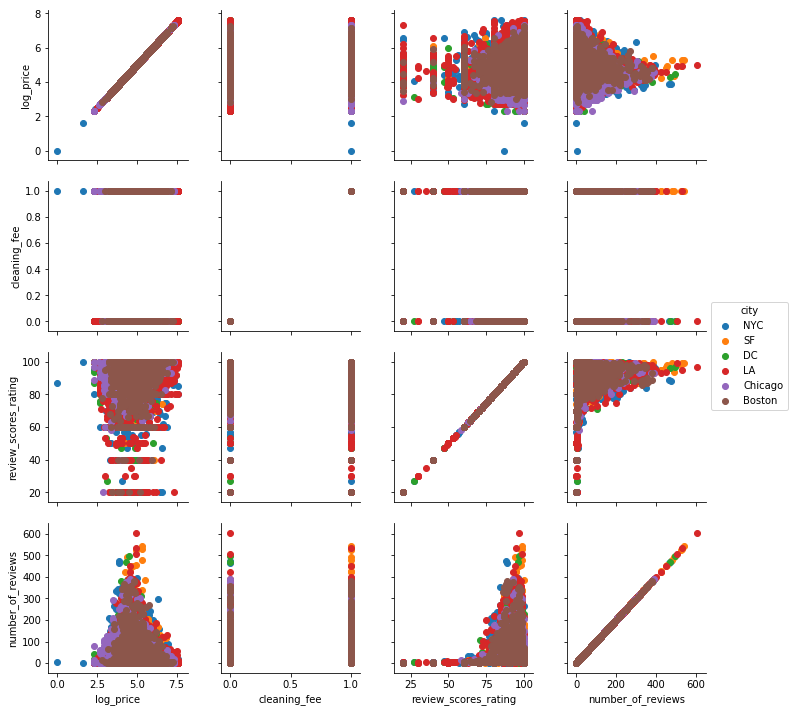

In [231]:
corrGraph = sns.PairGrid(train, hue="city", vars=["log_price","cleaning_fee","review_scores_rating", "number_of_reviews"])
corrGraph = corrGraph.map(plt.scatter)
corrGraph = corrGraph.add_legend()

In [232]:
'''
The above correlation graphs suggest that we need to take city into consideration and create a variable such as distance from the
city center as this would make more sense than longitude and latitude
'''

'\nThe above correlation graphs suggest that we need to take city into consideration and create a variable such as distance from the\ncity center as this would make more sense than longitude and latitude\n'

In [233]:
def haversine(longitude_1, latitude_1, longitude_2, latitude_2):
    """
    This haversine formula is used to calculate the circular distance between two points on earth
    """
    # Conversion to radians
    longitude_1, latitude_1, longitude_2, latitude_2 = map(radians, [longitude_1, latitude_1, longitude_2, latitude_2])

    dlongitude = longitude_2 - longitude_1 
    dlatitude = latitude_2 - latitude_1 
    a = sin(dlatitude/2)**2 + cos(latitude_1) * cos(latitude_2) * sin(dlongitude/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 3956 Radius of earth in miles.
    distance = c * r
    return distance

In [234]:
#Adding the distance to city center column to make sense of the longitude and latitude columns
train['distance_to_citycenter'] = train.apply(lambda row: haversine(row['longitude'], row['latitude'], 40.7638 ,73.9795) if row['city'] == 'NYC' else 
                                              haversine(row['longitude'], row['latitude'], 34.0522 ,118.2347) if row['city'] == 'LA' else
                                              haversine(row['longitude'], row['latitude'], 41.8781 ,87.6298) if row['city'] == 'Chicago' else
                                              haversine(row['longitude'], row['latitude'], 37.7749 ,122.4194) if row['city'] == 'SF' else
                                              haversine(row['longitude'], row['latitude'], 42.3601 ,71.0589) if row['city'] == 'Boston' else 
                                              haversine(row['longitude'], row['latitude'], 41.2874 ,96.0985) if row['city'] == 'DC' else -1
                                              , axis=1)   

In [235]:
train[['distance_to_citycenter','city']].sample(10)

,distance_to_citycenter,city
30667,3648.516554,LA
33511,3644.072249,LA
56233,6380.014639,NYC
50246,6378.393652,NYC
62597,6365.820244,NYC
73737,3644.122132,LA
40456,5378.318020,DC
44555,2632.072505,SF
28179,6367.647705,NYC
9614,3681.061342,LA


In [236]:
#Using Sentiment analyzer to identify sentiment behind name and description mentioned online

In [237]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for s in train['name'].values[:2]:
    print(s)
    ss = sia.polarity_scores(s)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Beautiful brownstone 1-bedroom
compound: 0.5994, neg: 0.0, neu: 0.339, pos: 0.661, 
Superb 3BR Apt Located Near Times Square
compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 


In [238]:
description_list = [d for d in train['description']]
polarity_scores_description = [sia.polarity_scores(description) for description in description_list]
name_list = [n for n in train['name']]
polarity_scores_name = [sia.polarity_scores(name) for name in name_list]

In [239]:
varList=[]
for i in polarity_scores_description:
    for j in i:
        varList.append(j)
    break
print(varList)

['neg', 'neu', 'pos', 'compound']


In [240]:
def addSentimentScores(Variable, dataset,varList,sentimentList):
    '''
    Adding sentiment scores to the dataset based on the variable 
    '''
    for i in varList:
        varName=Variable+'_'+i+'_sentiment'
        dataset[varName] = [score[i] for score in sentimentList]


In [241]:
for score in polarity_scores_description:
    print(score['neg'])
    break

0.048


In [242]:
addSentimentScores('description', train,varList,polarity_scores_description)
addSentimentScores('name', train,varList,polarity_scores_name)

In [243]:
from datetime import datetime
from dateutil.parser import parse
from datetime import timedelta
#This function is taking the max dates for each of the city and converting to datetime object
def data_max_date(row):
    if (row['city']=='Boston'):
        return datetime.strptime('2017-10-04', '%Y-%m-%d').date()
    elif (row['city']=='NYC'):
        return datetime.strptime('2017-10-01', '%Y-%m-%d').date()
    elif (row['city']=='LA'):
        return datetime.strptime('2017-05-02', '%Y-%m-%d').date()   
    elif (row['city']=='SF'):
        return datetime.strptime('2017-05-06', '%Y-%m-%d').date()     
    elif (row['city']=='Chicago'):
        return datetime.strptime('2017-05-09', '%Y-%m-%d').date()    
    elif (row['city']=='DC'):
        return datetime.strptime('2017-05-10', '%Y-%m-%d').date() 

train['data_max_date']=train.apply(lambda row: data_max_date(row), axis=1)

In [244]:
train['data_max_date'].sample(10)

4778     2017-05-02
30274    2017-10-01
22132    2017-05-02
65293    2017-10-01
27986    2017-05-02
1233     2017-05-02
43393    2017-10-01
16574    2017-10-01
39031    2017-10-01
26226    2017-05-02
Name: data_max_date, dtype: object

In [245]:
#Converting first_review, host since and last review to datetime
train['first_review'] = pd.to_datetime(train['first_review'])
train['host_since'] = pd.to_datetime(train['host_since'])
train['last_review'] = pd.to_datetime(train['last_review'])

In [246]:
train['first_review'].sample(10)

41721   2014-01-11
53424   2017-04-11
37901   2016-03-16
4167           NaT
74042   2016-07-06
63428   2015-05-06
33862   2014-08-25
48575   2015-06-25
61558   2017-06-03
38255   2015-07-19
Name: first_review, dtype: datetime64[ns]

In [247]:
train['first_review'] = train['first_review'].apply(lambda x: x.date())
train['host_since'] = train['host_since'].apply(lambda x: x.date())
train['last_review'] = train['last_review'].apply(lambda x: x.date())

In [250]:
train['first_review'].isnull().sum()/train['first_review'].shape[0]

0.2140572924397188

In [252]:
train['host_since'].isnull().sum()/train['host_since'].shape[0]

0.0025367354373844637

In [253]:
train['last_review'].isnull().sum()/train['last_review'].shape[0]

0.21355804131640377

In [249]:
train['first_review'].shape

(74111,)

In [185]:
train['DateDiffFirstReview'] = (train.data_max_date - train.first_review)/ np.timedelta64(1, 'D')
train['DateDiffHostSince'] = (train.data_max_date - train.host_since)/ np.timedelta64(1, 'D')
train['DateDiffLastReview'] = (train.data_max_date - train.last_review)/ np.timedelta64(1, 'D')
train['DateDiffFirstReview'].fillna(0, inplace=True)
train['DateDiffHostSince'].fillna(0, inplace=True)
train['DateDiffLastReview'].fillna(0, inplace=True)

In [21]:
'''Let's classify listings that have photos versus listings that do not have photos
We can do this by using the thumbnail variable'''
train['thumbnail_url'].fillna(0, inplace=True)
def photo(row):
    if (row['thumbnail_url']==0):
        return 0
    else:
        return 1
train['photo']=train.apply(lambda row: photo(row), axis=1)

In [22]:
'''Done with adding features for now
Let's work on feature engineering'''


"Done with adding features for now\nLet's work on feature engineering"

In [23]:
train.shape

(74111, 43)

In [24]:
train['amenities'] = train['amenities'].map(
    lambda amenities: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amenities.split(",")]))

In [25]:
amenities = np.unique(np.concatenate(train['amenities'].map(lambda amns: amns.split("|"))))

In [26]:
amenities.size

131

In [27]:
amenity_arr = np.array([train['amenities'].map(lambda amns: amn in amns) for amn in amenities])

In [28]:
train.shape

(74111, 43)

In [29]:
temp=pd.DataFrame(amenity_arr)
temp=temp.T

In [30]:
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
temp.shape

(74111, 131)

In [32]:
train[amenities]=temp

In [33]:
train.shape

(74111, 174)

In [34]:
amenities.size

131

In [35]:
#Converting true false to 1,0's
for a in amenities:
    train[a] = train[a].astype(int)

In [36]:
training_data=train

In [37]:
#Dropped data_max_date column
training_data=training_data.drop(['name', 'description', 'data_max_date', 'first_review', 'host_since', 'last_review', 'thumbnail_url', 'amenities'],axis=1)

In [38]:
training_data.shape

(74111, 166)

In [39]:
for tf_feature in ['host_identity_verified', 'host_has_profile_pic', 'instant_bookable']:
    training_data[tf_feature] = training_data[tf_feature].map(lambda s: 0 if s == "f" else 1)

In [40]:
for categorical_feature in ['cancellation_policy', 'property_type', 'room_type', 'bed_type','city']:
    training_data = pd.concat([training_data, pd.get_dummies(training_data[categorical_feature])], axis=1)

In [41]:
training_data = pd.concat([training_data, pd.get_dummies(training_data['neighbourhood'])], axis=1)

In [42]:
training_data.drop(['','city','cancellation_policy', 'property_type', 'room_type', 'bed_type'], axis = 1, inplace = True)
training_data.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,...,Winnetka,Winthrop,Woodhaven,Woodland,Woodland Hills/Warner Center,Woodlawn,Woodley Park,Woodridge,Woodside,Wrigleyville
0,6901257,5.010635,3,1.0,True,1,1,NaN,0,40.696524,...,0,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,7,1.0,True,1,0,100%,1,40.766115,...,0,0,0,0,0,0,0,0,0,0
2,7919400,4.976734,5,1.0,True,1,1,100%,1,40.808110,...,0,0,0,0,0,0,0,0,0,0
3,13418779,6.620073,4,1.0,True,1,1,NaN,0,37.772004,...,0,0,0,0,0,0,0,0,0,0
4,3808709,4.744932,2,1.0,True,1,1,100%,1,38.925627,...,0,0,0,0,0,0,0,0,0,0


In [43]:
training_data['host_response_rate'].sample(10)

24309    100%
23974     NaN
11768     NaN
59687     NaN
23118    100%
66598     NaN
24403     NaN
34271     70%
70437     NaN
36741     78%
Name: host_response_rate, dtype: object

In [44]:
#Stripping % from host_response_rate
host_response_r = []
for i in training_data['host_response_rate']:
    i = str(i)
    i = i.strip('%')
    i = float(i)
    host_response_r.append(i)

training_data['host_response_rate'] = host_response_r
#training_data.drop(['host_response_r'], axis = 1, inplace = True)
training_data.head()

,id,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,...,Winnetka,Winthrop,Woodhaven,Woodland,Woodland Hills/Warner Center,Woodlawn,Woodley Park,Woodridge,Woodside,Wrigleyville
0,6901257,5.010635,3,1.0,True,1,1,NaN,0,40.696524,...,0,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,7,1.0,True,1,0,100.0,1,40.766115,...,0,0,0,0,0,0,0,0,0,0
2,7919400,4.976734,5,1.0,True,1,1,100.0,1,40.808110,...,0,0,0,0,0,0,0,0,0,0
3,13418779,6.620073,4,1.0,True,1,1,NaN,0,37.772004,...,0,0,0,0,0,0,0,0,0,0
4,3808709,4.744932,2,1.0,True,1,1,100.0,1,38.925627,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,Wide clearance to bed,Wide clearance to shower & toilet,Wide clearance to shower and toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,6901257,5.010635,Apartment,Entire home/apt,Wireless Internet|Air conditioning|Kitchen|Hea...,3,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,1
1,6304928,5.129899,Apartment,Entire home/apt,Wireless Internet|Air conditioning|Kitchen|Hea...,7,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,1
2,7919400,4.976734,Apartment,Entire home/apt,TV|Cable TV|Wireless Internet|Air conditioning...,5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,1
3,13418779,6.620073,House,Entire home/apt,TV|Cable TV|Internet|Wireless Internet|Kitchen...,4,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,1,0,0
4,3808709,4.744932,Apartment,Entire home/apt,TV|Internet|Wireless Internet|Air conditioning...,2,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,1,0,0


In [46]:
c=[]
index=0
indexList=[]
for a in amenities:
    if ((np.sum(train[a])/train.shape[0])*100)<1:
        indexList.append(index)
    c.append((np.sum(train[a])/train.shape[0])*100)
    index=index+1

In [47]:
len(indexList)

60

In [48]:
dropAmenitiesList=[]
for i in indexList:
    dropAmenitiesList.append(amenities[i])

In [49]:
training_data=training_data.drop(dropAmenitiesList,axis=1)

In [50]:
k=train['neighbourhood'].dropna()
neighbourhood=[]
for i in k:
    if i not in neighbourhood and i!='nan':
        neighbourhood.append(i)


In [51]:
index=[]
i=0
for n in neighbourhood:
    if(np.sum(training_data[n]))<200:
        index.append(i)
    i=i+1
        
        

In [52]:
len(index)

530

In [53]:
len(neighbourhood)

619

In [54]:
#Dropping neighbourhood

In [55]:
training_data=training_data.drop(neighbourhood,axis=1)

In [56]:
training_data=training_data.drop(['neighbourhood','zipcode','longitude','latitude'],axis=1)

In [57]:
train['neighbourhood'].head()

0    Brooklyn Heights
1      Hell's Kitchen
2              Harlem
3        Lower Haight
4    Columbia Heights
Name: neighbourhood, dtype: object

In [256]:
(train.isnull().sum()/train.shape[0])*100

id                                 0.000000
log_price                          0.000000
property_type                      0.000000
room_type                          0.000000
amenities                          0.000000
accommodates                       0.000000
bathrooms                          0.269865
bed_type                           0.000000
cancellation_policy                0.000000
cleaning_fee                       0.000000
city                               0.000000
description                        0.000000
first_review                      21.405729
host_has_profile_pic               0.253674
host_identity_verified             0.253674
host_response_rate                24.691341
host_since                         0.253674
instant_bookable                   0.000000
last_review                       21.355804
latitude                           0.000000
longitude                          0.000000
name                               0.000000
neighbourhood                   

In [58]:
for col in training_data.columns[training_data.isnull().any()]:
    training_data[col] = training_data[col].fillna(training_data[col].median())

In [59]:
#Training data set 
trainingSet = training_data
y_train = training_data['log_price']
X_train = trainingSet
X_train.drop(['log_price'], axis = 1, inplace = True)

In [60]:
#Doing the same data transformation for the testing set

In [61]:
#Adding the distance to city center column to make sense of the longitude and latitude columns
test['distance_to_citycenter'] = test.apply(lambda row: haversine(row['longitude'], row['latitude'], 40.7638 ,73.9795) if row['city'] == 'NYC' else 
                                              haversine(row['longitude'], row['latitude'], 34.0522 ,118.2347) if row['city'] == 'LA' else
                                              haversine(row['longitude'], row['latitude'], 41.8781 ,87.6298) if row['city'] == 'Chicago' else
                                              haversine(row['longitude'], row['latitude'], 37.7749 ,122.4194) if row['city'] == 'SF' else
                                              haversine(row['longitude'], row['latitude'], 42.3601 ,71.0589) if row['city'] == 'Boston' else 
                                              haversine(row['longitude'], row['latitude'], 41.2874 ,96.0985) if row['city'] == 'DC' else -1
                                              , axis=1)   

In [62]:
test[['distance_to_citycenter','city']].sample(10)

,distance_to_citycenter,city
12393,5513.941169,Chicago
5078,6375.390085,NYC
10591,3679.569187,LA
11624,2636.373344,SF
19158,3664.148228,LA
19739,3642.052144,LA
8454,6375.243068,NYC
20923,6367.215737,NYC
22964,6363.998413,NYC
12498,6375.886192,NYC


In [63]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for s in test['name'].values[:2]:
    print(s)
    ss = sia.polarity_scores(s)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Santa Monica Private Bedroom/Bathroom Suite
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Bright, charming luxury 1 BR with amazing rooftop
compound: 0.8885, neg: 0.0, neu: 0.276, pos: 0.724, 


In [64]:
test['description'].head()

0    Close to SM beaches, 3rd Street Promenade, SM ...
1    This apartment will give you a true (luxury) B...
2    Spacious 1 bedroom apartment apartment with se...
3    Very clean 1 Bedroom Jr. 3/4 Bath unit located...
4    My apartment is airy & light, brand new renova...
Name: description, dtype: object

In [65]:
test['name'][1]

'Bright, charming luxury 1 BR with amazing rooftop'

In [66]:
print(test['description'][9445])

nan


In [69]:
test['description']=test['description'].fillna("room", inplace=True)
test['name'].fillna("room", inplace=True)

In [1]:
def transform(row):
    '''
    Handling missing values in description as room
    Room seems to be a very common word used in most listing descriptions
    '''
    if row['description']==None:
        return "room"
    else:
        return row['description']

In [71]:
test['description']=test.apply(lambda row: transform(row), axis=1)
test['name']=test.apply(lambda row: transform(row), axis=1)

In [72]:
description_list = [d for d in test['description']]
polarity_scores_description = [sia.polarity_scores(description) for description in description_list]
name_list = [n for n in test['name']]
polarity_scores_name = [sia.polarity_scores(name) for name in name_list]

In [ ]:
addSentimentScores('description', test,varList,polarity_scores_description)
addSentimentScores('name', test,varList,polarity_scores_name)

In [75]:
test['data_max_date']=test.apply(lambda row: data_max_date(row), axis=1)

In [76]:
#Converting first_review, host since and last review to datetime
test['first_review'] = pd.to_datetime(test['first_review'])
test['host_since'] = pd.to_datetime(test['host_since'])
test['last_review'] = pd.to_datetime(test['last_review'])
test['first_review'] = test['first_review'].apply(lambda x: x.date())
test['host_since'] = test['host_since'].apply(lambda x: x.date())
test['last_review'] = test['last_review'].apply(lambda x: x.date())

In [77]:
test['DateDiffFirstReview'] = (test.data_max_date - test.first_review)/ np.timedelta64(1, 'D')
test['DateDiffHostSince'] = (test.data_max_date - test.host_since)/ np.timedelta64(1, 'D')
test['DateDiffLastReview'] = (test.data_max_date - test.last_review)/ np.timedelta64(1, 'D')
test['DateDiffFirstReview'].fillna(0, inplace=True)
test['DateDiffHostSince'].fillna(0, inplace=True)
test['DateDiffLastReview'].fillna(0, inplace=True)

In [78]:
'''Let's classify listings that have photos versus listings that do not have photos
We can do this by using the thumbnail variable'''
test['thumbnail_url'].fillna(0, inplace=True)
def photo(row):
    if (row['thumbnail_url']==0):
        return 0
    else:
        return 1
test['photo']=train.apply(lambda row: photo(row), axis=1)

In [79]:
test['amenities'] = test['amenities'].map(
    lambda amenities: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amenities.split(",")]))


In [80]:
amenity_arr = np.array([train['amenities'].map(lambda amns: amn in amns) for amn in amenities])

In [81]:
temp=pd.DataFrame(amenity_arr)
temp=temp.T

In [82]:
test[amenities]=temp

In [83]:
for a in amenities:
    test[a] = test[a].astype(int)

In [84]:
test_data=test

In [85]:
#Dropped data_max_date columncolumns that have been transformed
test_data=test_data.drop(['name', 'description', 'data_max_date', 'first_review', 'host_since', 'last_review', 'thumbnail_url', 'amenities'],axis=1)

In [86]:
for tf_feature in ['host_identity_verified', 'host_has_profile_pic', 'instant_bookable']:
    test_data[tf_feature] = test_data[tf_feature].map(lambda s: 0 if s == "f" else 1)

In [87]:
for categorical_feature in ['cancellation_policy', 'property_type', 'room_type', 'bed_type','city']:
    test_data = pd.concat([test_data, pd.get_dummies(test_data[categorical_feature])], axis=1)

In [88]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['neighbourhood'])], axis=1)

In [89]:
test_data.drop(['','city','cancellation_policy', 'property_type', 'room_type', 'bed_type'], axis = 1, inplace = True)
test_data.head()

,id,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,...,Wilmington,Windsor Terrace,Winnetka,Woodhaven,Woodland Hills/Warner Center,Woodlawn,Woodley Park,Woodridge,Woodside,Wrigleyville
0,3895911,2,1.0,True,1,0,100%,0,34.028372,-118.494449,...,0,0,0,0,0,0,0,0,0,0
1,9710289,3,1.0,True,1,1,100%,0,40.720380,-73.942329,...,0,0,0,0,0,0,0,0,0,0
2,9051635,1,1.0,True,1,1,100%,0,37.785434,-122.470284,...,0,0,0,0,0,0,0,0,0,0
3,708374,1,1.0,True,1,1,100%,0,33.976026,-118.463471,...,0,0,0,0,0,0,0,0,0,0
4,626296,2,1.0,True,1,1,NaN,0,40.735573,-74.005996,...,0,0,0,0,0,0,0,0,0,0


In [90]:
#Stripping % from host_response_rate
host_response_r = []
for i in test_data['host_response_rate']:
    i = str(i)
    i = i.strip('%')
    i = float(i)
    host_response_r.append(i)

test_data['host_response_rate'] = host_response_r
#training_data.drop(['host_response_r'], axis = 1, inplace = True)
test_data.head()

,id,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,...,Wilmington,Windsor Terrace,Winnetka,Woodhaven,Woodland Hills/Warner Center,Woodlawn,Woodley Park,Woodridge,Woodside,Wrigleyville
0,3895911,2,1.0,True,1,0,100.0,0,34.028372,-118.494449,...,0,0,0,0,0,0,0,0,0,0
1,9710289,3,1.0,True,1,1,100.0,0,40.720380,-73.942329,...,0,0,0,0,0,0,0,0,0,0
2,9051635,1,1.0,True,1,1,100.0,0,37.785434,-122.470284,...,0,0,0,0,0,0,0,0,0,0
3,708374,1,1.0,True,1,1,100.0,0,33.976026,-118.463471,...,0,0,0,0,0,0,0,0,0,0
4,626296,2,1.0,True,1,1,NaN,0,40.735573,-74.005996,...,0,0,0,0,0,0,0,0,0,0


In [91]:
test_data=test_data.drop(dropAmenitiesList,axis=1)

In [92]:
test_data=test_data.drop(['neighbourhood','zipcode','longitude','latitude'],axis=1)

In [93]:
for col in test_data.columns[test_data.isnull().any()]:
    test_data[col] = test_data[col].fillna(test_data[col].median())

In [94]:
#Training data set 
testSet = test_data
X_test = testSet



In [95]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
Xtest = sc.fit_transform(X_test)

c:\Users\Pooja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\Users\Pooja\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
Xtest

array([[-1.21063401, -0.54357798, -0.40327751, ..., -0.01401572,
        -0.03656937, -0.02659976],
       [-0.25627279, -0.07100317, -0.40327751, ..., -0.01401572,
        -0.03656937, -0.02659976],
       [-0.36438304, -1.01615278, -0.40327751, ..., -0.01401572,
        -0.03656937, -0.02659976],
       ...,
       [ 0.43133374, -0.54357798, -0.40327751, ..., -0.01401572,
        -0.03656937, -0.02659976],
       [-0.21872783,  0.40157164, -0.40327751, ..., -0.01401572,
        -0.03656937, -0.02659976],
       [ 0.28148005, -0.54357798, -0.40327751, ..., -0.01401572,
        -0.03656937, -0.02659976]])

In [97]:
Xtrain=X_train
ytrain=y_train
Xtest=X_test

In [ ]:
#We are splitting this to just evaluate the model performance

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.001, random_state = 891990)
#y_train = y_train.values.reshape(-1, 1)
#y_test = y_test.values.reshape(-1, 1)
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

c:\Users\Pooja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\Users\Pooja\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\Users\Pooja\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by StandardScaler.


In [99]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

In [116]:
gbr = GradientBoostingRegressor(max_leaf_nodes=200, learning_rate=0.01, n_estimators=3000, verbose=1)
#gbm = lgb.LGBMRegressor(num_leaves=190, learning_rate=0.0109, n_estimators=4000, verbose=1, max_depth=-1)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.5092           35.01m
         2           0.5038           39.13m
         3           0.4985           37.57m
         4           0.4934           36.75m
         5           0.4883           36.77m
         6           0.4834           36.35m
         7           0.4785           36.06m
         8           0.4737           35.87m
         9           0.4691           35.72m
        10           0.4645           35.55m
        20           0.4234           34.55m
        30           0.3895           34.01m
        40           0.3615           33.74m
        50           0.3382           33.50m
        60           0.3188           33.33m
        70           0.3027           33.17m
        80           0.2891           33.55m
        90           0.2776           33.33m
       100           0.2679           33.39m
       200           0.2193           32.13m
       300           0.2002           30.54m
       40

In [108]:
x_pred = gbr.predict(X_train)

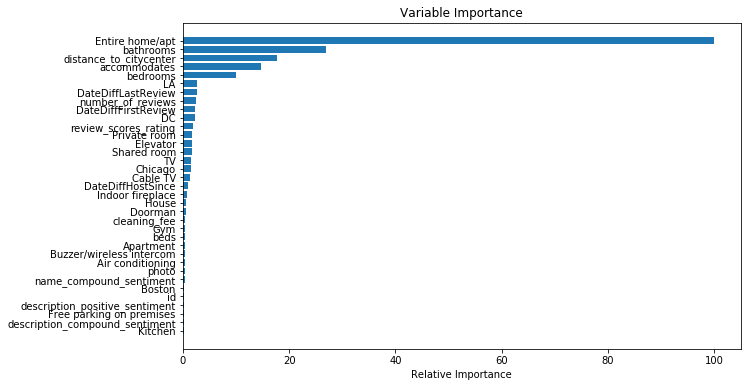

In [105]:
top = 35
feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], Xtrain.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [114]:
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,x_pred)

In [115]:
print(test_score)
print(train_score)

0.7260351862224163
0.7024427336250543


In [121]:
gbr2=gbr.fit(Xtrain, ytrain)
#y_pred = gbr.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.5092           35.81m
         2           0.5038           37.93m
         3           0.4985           37.79m
         4           0.4934           37.45m
         5           0.4883           38.07m
         6           0.4834           37.53m
         7           0.4785           37.15m
         8           0.4738           37.66m
         9           0.4691           37.38m
        10           0.4645           37.11m
        20           0.4234           36.11m
        30           0.3896           35.45m
        40           0.3615           35.09m
        50           0.3382           34.95m
        60           0.3188           34.68m
        70           0.3027           34.55m
        80           0.2891           34.37m
        90           0.2776           34.24m
       100           0.2679           34.09m
       200           0.2194           32.12m
       300           0.2003           30.33m
       40

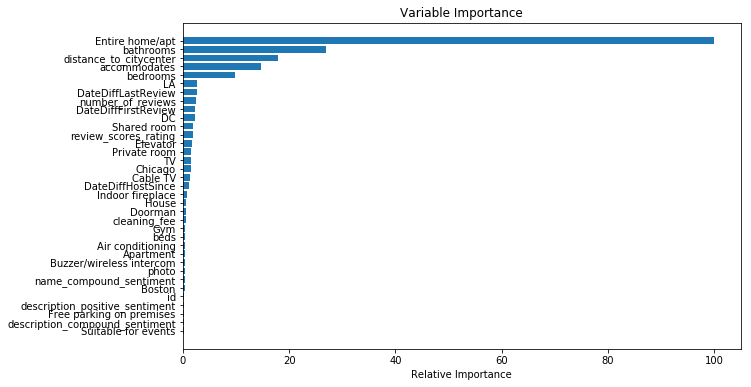

In [122]:
top = 35
feature_importance = gbr2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], Xtrain.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [118]:
rfr = RandomForestRegressor(max_leaf_nodes=200,  n_estimators=3000, verbose=1)
#gbm = lgb.LGBMRegressor(num_leaves=190, learning_rate=0.0109, n_estimators=4000, verbose=1, max_depth=-1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed: 54.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.1s finished


In [119]:
x_predrfr = gbr.predict(X_train)

In [125]:
test_scorerfr=r2_score(y_test,y_predrfr)
train_scorerfr=r2_score(y_train,x_predrfr)

In [126]:
print(test_scorerfr)
print(train_scorerfr)

0.648400890176847
0.705081394694401


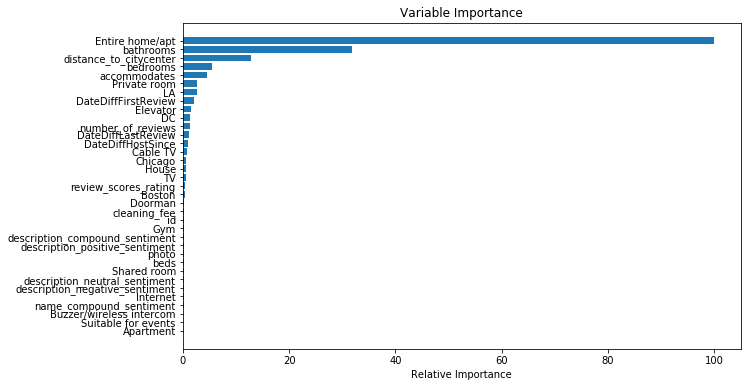

In [120]:
top = 35
feature_importance = rfr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], Xtrain.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [123]:
rfr2=rfr.fit(Xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed: 53.8min finished


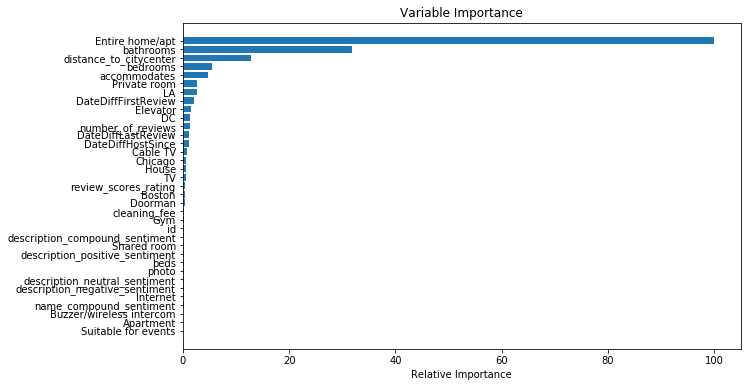

In [124]:
top = 35
feature_importance = rfr2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], Xtrain.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()